In [1]:
!pip install tensorflow

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

In [4]:
# Load and preprocess CIFAR-10 dataset
print("Loading and preprocessing data...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Loading and preprocessing data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Flatten the images for machine learning algorithms
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to range 0-1
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

In [6]:
# Standardize data for machine learning algorithms
scaler = StandardScaler()
x_train_ml = scaler.fit_transform(x_train_flat)
x_test_ml = scaler.transform(x_test_flat)

In [7]:
# Convert labels for machine learning algorithms
y_train_ml = y_train.flatten()
y_test_ml = y_test.flatten()

In [8]:
# Dictionary to store results and detailed metrics
results = {}
detailed_results = {}

In [9]:
# Function to evaluate and store metrics
def evaluate_model(y_true, y_pred, model_name):
    # Calculate and store basic accuracy
    accuracy = accuracy_score(y_true, y_pred)
    results[model_name] = accuracy

    # Generate and store detailed classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    detailed_results[model_name] = report

    # Create and display confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print detailed classification report
    print(f"\nDetailed Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))


Training and evaluating KNN...


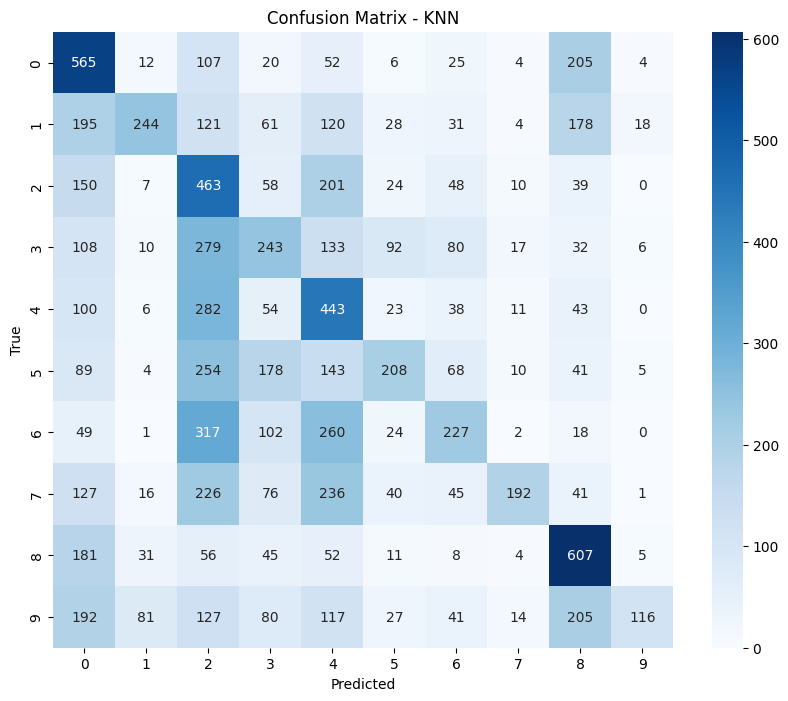


Detailed Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.32      0.56      0.41      1000
           1       0.59      0.24      0.35      1000
           2       0.21      0.46      0.29      1000
           3       0.26      0.24      0.25      1000
           4       0.25      0.44      0.32      1000
           5       0.43      0.21      0.28      1000
           6       0.37      0.23      0.28      1000
           7       0.72      0.19      0.30      1000
           8       0.43      0.61      0.50      1000
           9       0.75      0.12      0.20      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



In [10]:
# Train and evaluate KNN
print("\nTraining and evaluating KNN...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_ml, y_train_ml)
y_pred_knn = knn.predict(x_test_ml)
evaluate_model(y_test_ml, y_pred_knn, 'KNN')


Training and evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


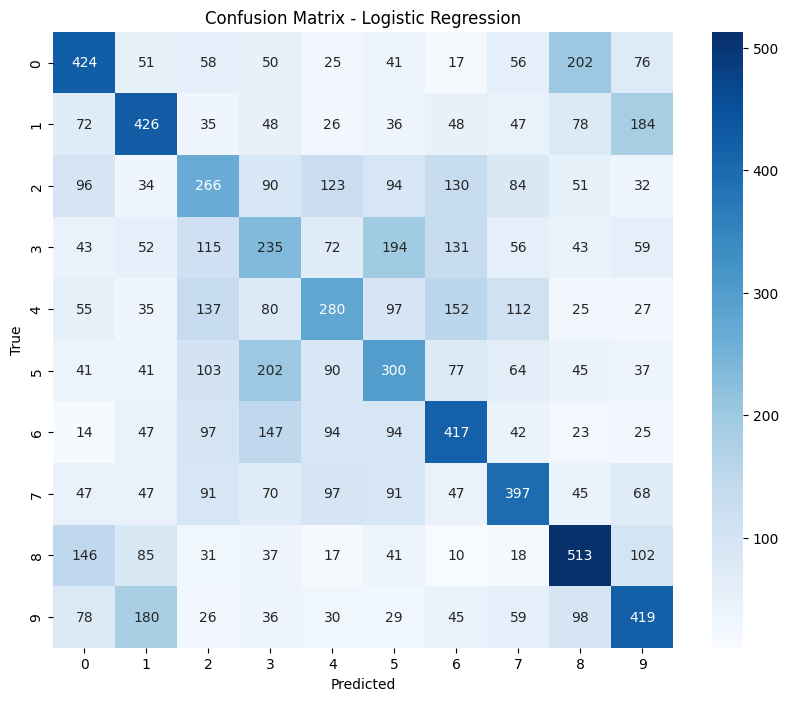


Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42      1000
           1       0.43      0.43      0.43      1000
           2       0.28      0.27      0.27      1000
           3       0.24      0.23      0.24      1000
           4       0.33      0.28      0.30      1000
           5       0.29      0.30      0.30      1000
           6       0.39      0.42      0.40      1000
           7       0.42      0.40      0.41      1000
           8       0.46      0.51      0.48      1000
           9       0.41      0.42      0.41      1000

    accuracy                           0.37     10000
   macro avg       0.37      0.37      0.37     10000
weighted avg       0.37      0.37      0.37     10000



In [11]:
# Train and evaluate Logistic Regression
print("\nTraining and evaluating Logistic Regression...")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_ml, y_train_ml)
y_pred_logreg = logreg.predict(x_test_ml)
evaluate_model(y_test_ml, y_pred_logreg, 'Logistic Regression')


Training and evaluating Random Forest...


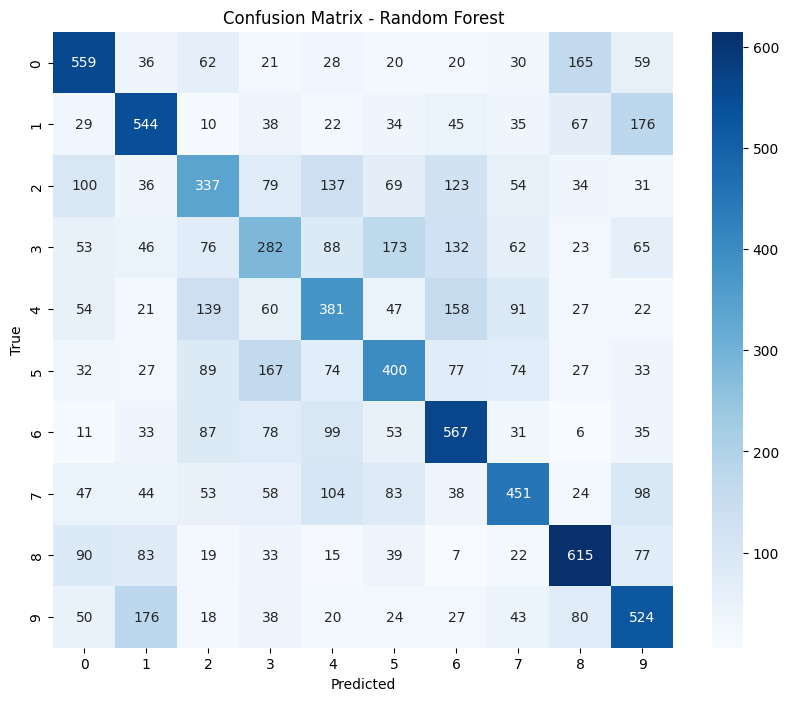


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1000
           1       0.52      0.54      0.53      1000
           2       0.38      0.34      0.36      1000
           3       0.33      0.28      0.30      1000
           4       0.39      0.38      0.39      1000
           5       0.42      0.40      0.41      1000
           6       0.47      0.57      0.52      1000
           7       0.51      0.45      0.48      1000
           8       0.58      0.61      0.59      1000
           9       0.47      0.52      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



In [12]:
# Train and evaluate Random Forest
print("\nTraining and evaluating Random Forest...")
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_ml, y_train_ml)
y_pred_rf = rf.predict(x_test_ml)
evaluate_model(y_test_ml, y_pred_rf, 'Random Forest')


Training and evaluating Naive Bayes...


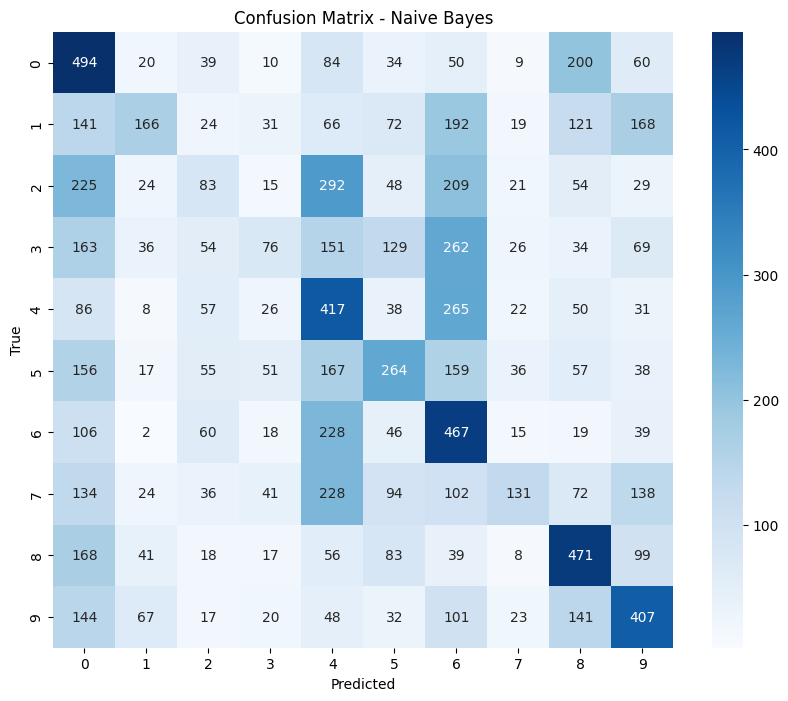


Detailed Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.27      0.49      0.35      1000
           1       0.41      0.17      0.24      1000
           2       0.19      0.08      0.12      1000
           3       0.25      0.08      0.12      1000
           4       0.24      0.42      0.30      1000
           5       0.31      0.26      0.29      1000
           6       0.25      0.47      0.33      1000
           7       0.42      0.13      0.20      1000
           8       0.39      0.47      0.42      1000
           9       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.28     10000
weighted avg       0.31      0.30      0.28     10000



In [13]:
# Train and evaluate Naive Bayes
print("\nTraining and evaluating Naive Bayes...")
nb = GaussianNB()
nb.fit(x_train_ml, y_train_ml)
y_pred_nb = nb.predict(x_test_ml)
evaluate_model(y_test_ml, y_pred_nb, 'Naive Bayes')


Training and evaluating K-Means...


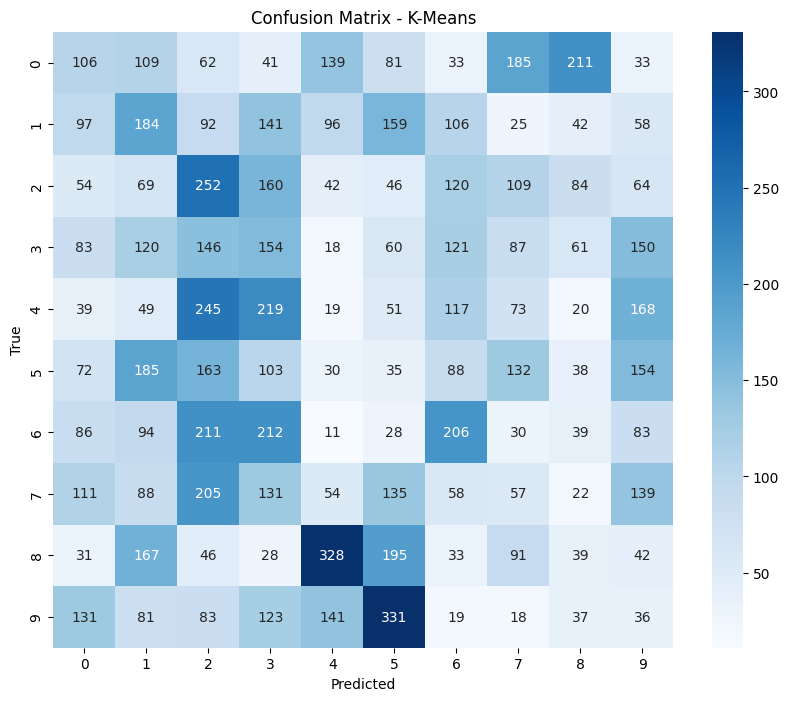


Detailed Classification Report for K-Means:
              precision    recall  f1-score   support

           0       0.13      0.11      0.12      1000
           1       0.16      0.18      0.17      1000
           2       0.17      0.25      0.20      1000
           3       0.12      0.15      0.13      1000
           4       0.02      0.02      0.02      1000
           5       0.03      0.04      0.03      1000
           6       0.23      0.21      0.22      1000
           7       0.07      0.06      0.06      1000
           8       0.07      0.04      0.05      1000
           9       0.04      0.04      0.04      1000

    accuracy                           0.11     10000
   macro avg       0.10      0.11      0.10     10000
weighted avg       0.10      0.11      0.10     10000



In [14]:
# Train and evaluate K-Means
print("\nTraining and evaluating K-Means...")
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_train_ml)
y_pred_kmeans = kmeans.predict(x_test_ml)
evaluate_model(y_test_ml, y_pred_kmeans, 'K-Means')

In [15]:
# Prepare data for CNN
print("\nPreparing data for CNN...")
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

# Build and train CNN model
print("\nBuilding and training CNN...")
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


Preparing data for CNN...

Building and training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train CNN with progress tracking
history = cnn_model.fit(x_train, y_train_cnn,
                       epochs=10,
                       validation_data=(x_test, y_test_cnn),
                       batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.2478 - loss: 1.9934 - val_accuracy: 0.4949 - val_loss: 1.4161
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.4528 - loss: 1.5049 - val_accuracy: 0.5459 - val_loss: 1.2612
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.5195 - loss: 1.3466 - val_accuracy: 0.5906 - val_loss: 1.1682
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.5683 - loss: 1.2176 - val_accuracy: 0.6196 - val_loss: 1.0884
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.6020 - loss: 1.1468 - val_accuracy: 0.6484 - val_loss: 1.0080
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6246 - loss: 1.0810 - val_accuracy: 0.6745 - val_loss: 0.9375
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.6465 - loss: 1.0177 - val_accuracy: 0.6746 - val_loss: 0.9380
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.6605 - loss: 0.9815 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


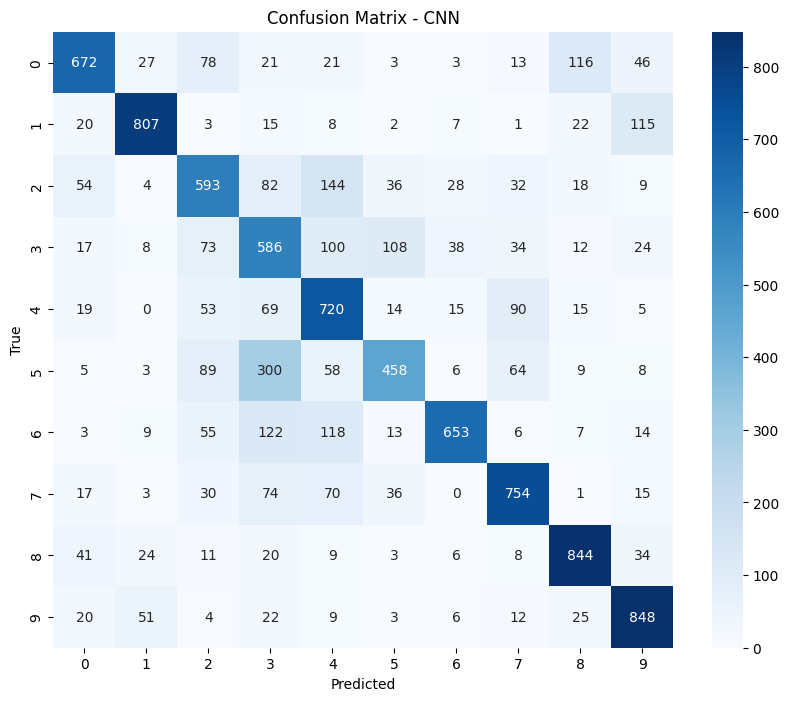


Detailed Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1000
           1       0.86      0.81      0.83      1000
           2       0.60      0.59      0.60      1000
           3       0.45      0.59      0.51      1000
           4       0.57      0.72      0.64      1000
           5       0.68      0.46      0.55      1000
           6       0.86      0.65      0.74      1000
           7       0.74      0.75      0.75      1000
           8       0.79      0.84      0.82      1000
           9       0.76      0.85      0.80      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



In [17]:
# Evaluate CNN
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_test_cnn_labels = np.argmax(y_test_cnn, axis=1)
evaluate_model(y_test_cnn_labels, y_pred_cnn, 'CNN')

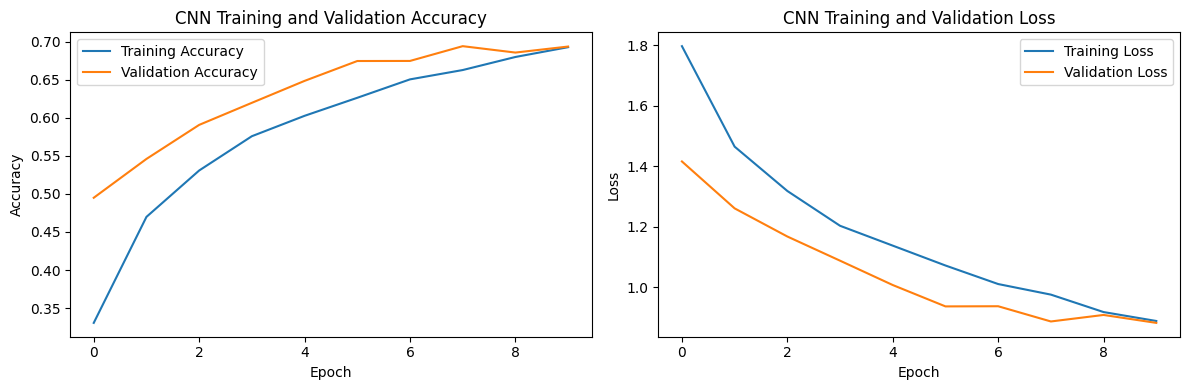

In [18]:
# Plot CNN training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Training and Validation Loss')
plt.tight_layout()
plt.show()

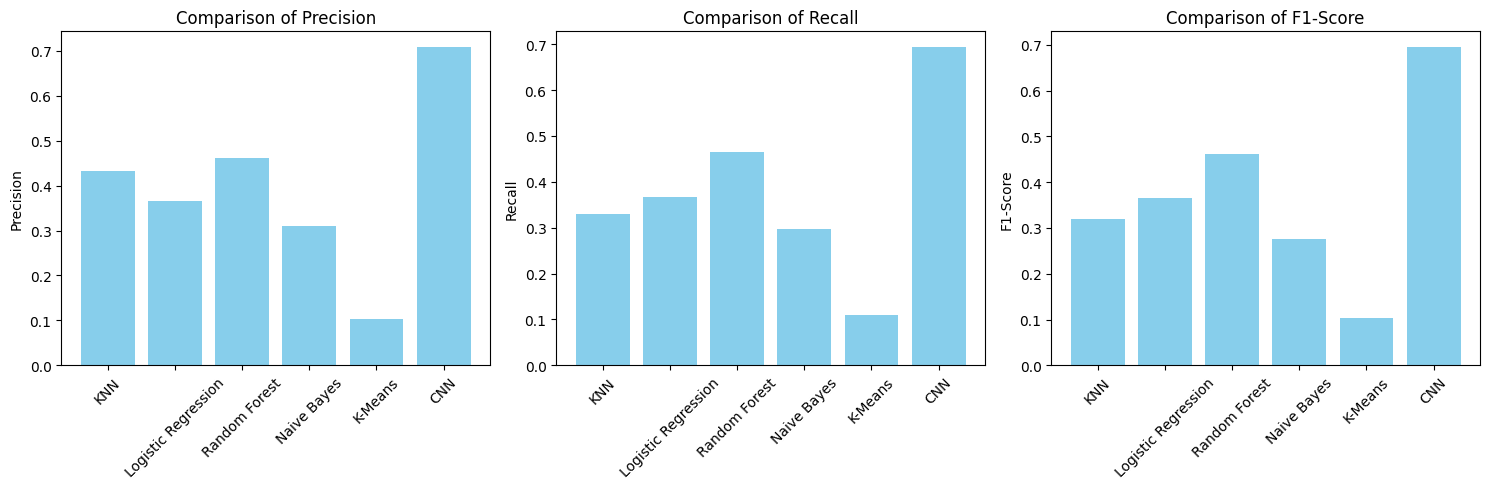

In [19]:
# Create comparison plots for different metrics
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    metric_values = []

    for model in detailed_results:
        metric_values.append(detailed_results[model]['macro avg'][metric])

    plt.bar(detailed_results.keys(), metric_values, color='skyblue')
    plt.title(f'Comparison of {metric.title()}')
    plt.xticks(rotation=45)
    plt.ylabel(metric.title())

plt.tight_layout()
plt.show()

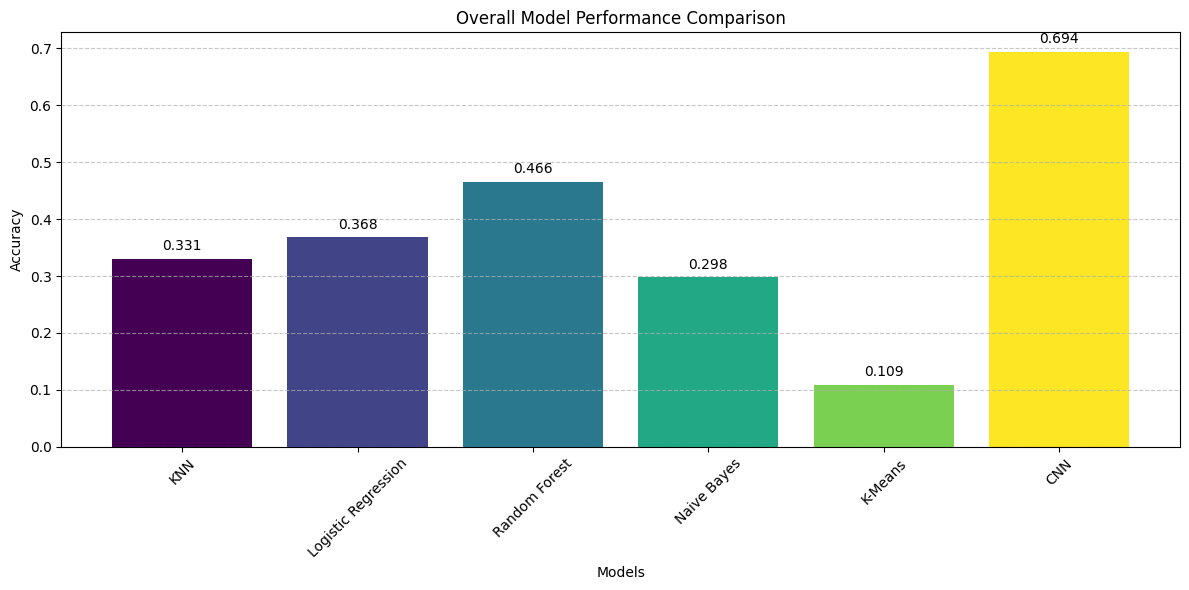

In [20]:
# Create overall performance comparison
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(results)))
plt.bar(results.keys(), results.values(), color=colors)
for i, (model, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Overall Model Performance Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
# Print summary table of all metrics
print("\nSummary of Macro-Averaged Metrics:")
print("\nModel\t\t\tPrecision\tRecall\t\tF1-Score\t\tAccuracy")
print("-" * 85)
for model in detailed_results:
    metrics = detailed_results[model]['macro avg']
    print(f"{model:<20} {metrics['precision']:.3f}\t\t{metrics['recall']:.3f}\t\t{metrics['f1-score']:.3f}\t\t{results[model]:.3f}")


Summary of Macro-Averaged Metrics:

Model			Precision	Recall		F1-Score		Accuracy
-------------------------------------------------------------------------------------
KNN                  0.434		0.331		0.319		0.331
Logistic Regression  0.366		0.368		0.366		0.368
Random Forest        0.462		0.466		0.463		0.466
Naive Bayes          0.311		0.298		0.275		0.298
K-Means              0.103		0.109		0.104		0.109
CNN                  0.708		0.694		0.695		0.694


In [22]:
# Save the CNN model
cnn_model.save('cifar10_cnn_model.keras')
print("\nCNN model saved as cifar10_cnn_model.keras")


CNN model saved as cifar10_cnn_model.keras
